# Analyse av elbilers oppgitte WLTP-rekkevidde

## 1. Innledning
Denne rapporten har som formål å undersøke forholdet mellom bilprodusenters oppgitte rekkevidde (WLTP) og faktisk rekkevidde målt av Motor og NAF under vinterforhold. Temperatur og veiforhold påvirker elbilers rekkevidde, og denne rapporten ser på hvor mye mindre rekkevidde man kan vente seg sammenlignet med den oppgitte rekkevidden.

## 2. Metode
Data er hentet fra Motor/NAFs vintertest 2023. Tabellen ble vasket i Python ved å fjerne overflødig informasjon samt dele opp kolonner i rene tallverdier. En ny kolonne som viser forholdet mellom oppgitt rekkevidde og målt rekkevidde er lagt til. Videre er det gjort en lineær regresjonsanalyse (f(x) = ax + b), som brukes for å undersøke sammenhengen mellom WLTP-rekkevidde og målt rekkevidde fra testen. Til slutt visualiseres dette i to plott, ett med og ett uten origo.

## 3. Funn
Regresjonsmodellen har et stigningstall som er under 1. Dette betyr at faktisk rekkevidde er lavere enn oppgitt. Ser man på forholdet mellom WLTP og STOP, er det ingen biler som har et forholdstall på 0,9 eller høyere. Dette betyr at alle bilene i testen hadde en rekkevidde på under 90 % av det som er oppgitt av produsenten. Det er varierende grad av avvik fra den oppgitte rekkevidden, hvor det største avviket er på 32 % og det laveste på 11 %. Det gjennomsnittlige avviket for alle bilene i testen er 19 %.

Selv om ingen av bilene måler en rekkevidde på nivå med den oppgitte, er det likevel en sammenheng, med noen unntak. Det fremkommer at en høyere oppgitt WLTP-rekkevidde som oftest også tilsier en høyere målt rekkevidde.

I dataframet er de to kolonnene "Avvik (%)" og "Forhold STOP WLTP" korrelerte. De viser den samme informasjonen, men fremstilt på forskjellig vis. "Avvik" viser i prosent hvor stort avviket fra den oppgitte rekkevidden er. Kolonnen som viser forholdet, viser den målte rekkevidden som en andel av den oppgitte, der 1 tilsvarer den oppgitte WLTP-rekkevidden.

Det er fremstilt to plott, hvorav ett med og ett uten origo. Dette er for å vise hvordan dataene fremstår forskjellig avhengig av om man tar med origo eller ikke. Når origo ikke inkluderes i figuren, virker forskjellen mellom målt og oppgitt rekkevidde mindre. Dette kan oppfattes som "tukling" med y-aksen. Figuren som inkluderer origo er derfor en mer ærlig fremstilling.

## 4. Konklusjon
Bilene i testen presterer ikke på nivå med det som oppgis av produsenten. Det skal likevel tas i betraktning at denne testen er utført under vinterforhold, mens WLTP beregnes under mer optimale kjøreforhold. Det er likevel både store avvik og stor variasjon i avvikene, slik at man ikke med tilstrekkelig grad av sannsynlighet kan påstå at leverandørene holder det de lover. Det er mulig at bilene med lavest avvik kan prestere på et nivå som er tilnærmet likt det som oppgis fra produsenten, men det er usannsynlig når det gjelder de bilene med høyest avvik. Jevnt over burde WLTP-rekkevidden tas med en klype salt, og ikke brukes som et sikkert grunnlag for turplanlegging og lignende.


Regresjonsmodell: f(x) = 0.87x + -26.65


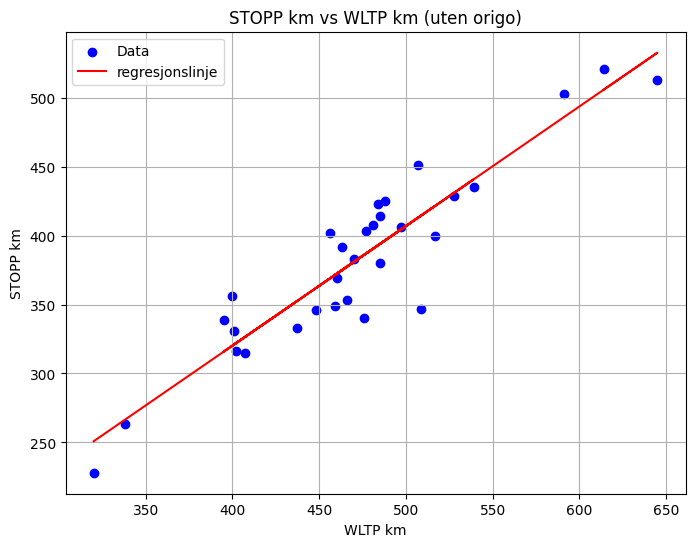

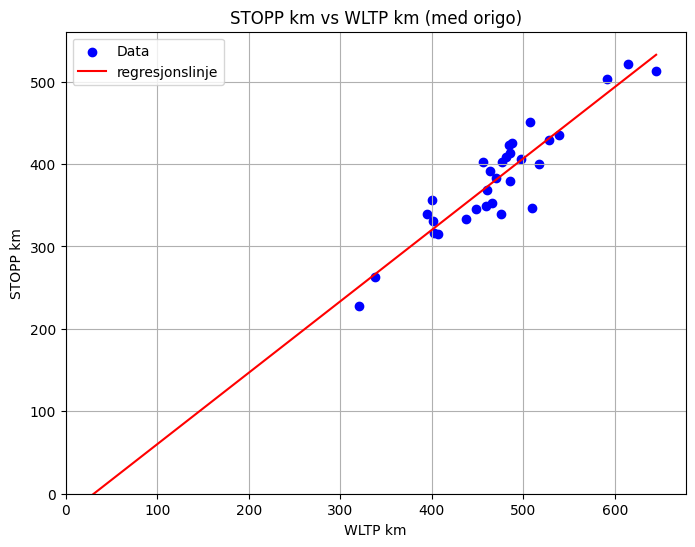

Gjennomsnittlig avvik: -19.07%


In [ ]:
# Laster inn pandas
import pandas as pd

# Laster inn nettsiden
url = "https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132" 

# Bruker pandas til å lese inn tabellene fra nettsiden
tables = pd.read_html(url)

# Bruker indeks 0 for å velge den første tabellen på nettsiden og legger den til en variabel (df)
df = tables[0]


# Bruker regex til splitte kolonnen i to. En for km og en for kWh.
df[['WLTP (km)', 'WLTP (kWh per 100km)']] = df['WLTP-tall'].str.extract(r'(\d+)\D+([\d,]+)')


# Konverterer km verdiene til integer.
df['WLTP (km)'] = df['WLTP (km)'].astype(int)
# Endrer , til . for verdiene i kWh per 100km kolonnen. Konverterer så til float.
df['WLTP (kWh per 100km)'] = df['WLTP (kWh per 100km)'].str.replace(',', '.').astype(float) 


# Fjerner unødvendige kolonner og rader
df = df.drop('WLTP-tall', axis = 1)
df = df.drop([18, 25], axis = 0)

# Fjerner benevning fra verdiene i STOPP og legger det til i tittelen. Konverterer også til integer. 
df['STOPP'] = df['STOPP'].str.replace('km', '').astype(int)
df = df.rename(columns={'STOPP': 'STOPP (km)'})

# Fjerner % fra verdiene og legger det til i tittelen. Konverterer også til float. 
df['Avvik'] = df['Avvik'].str.replace('%', '').str.replace(',', '.').astype(float)
df = df.rename(columns={'Avvik': 'Avvik (%)'})


# lager en ny kolonne med forholdet mellom WLTP og STOPP lengde. Runder av til 2 desimaler. 
df['Forhold STOPP WLTP'] = df['STOPP (km)'] / df['WLTP (km)']
df['Forhold STOPP WLTP'] = df['Forhold STOPP WLTP'].round(2)




import numpy as np

# Definerer x og y
x = df['WLTP (km)']
y = df['STOPP (km)']

# Bruker polyfit for å finne linjen: f(x) = a*x + b
a, b = np.polyfit(x, y, deg=1)

print(f"Regresjonsmodell: f(x) = {a:.2f}x + {b:.2f}")

# lager en variabel for funksjonen ax+b 
model_output = a * x + b



# Lager plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, model_output, color='red', label='regresjonslinje')

plt.xlabel('WLTP km')
plt.ylabel('STOPP km')
plt.title('STOPP km vs WLTP km (uten origo)')
plt.legend()
plt.grid(True)
plt.show()





# Lager et plot med origo
x_line = np.linspace(0, x.max(), 100)
y_line = a * x_line + b

plt.figure(figsize=(8,6))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x_line, y_line, color='red', label='regresjonslinje')

plt.xlabel('WLTP km')
plt.ylabel('STOPP km')
plt.title('STOPP km vs WLTP km (med origo)')
plt.legend()
plt.grid(True)

# Sett aksene til å starte på 0
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()



# Bruker pandas til å finne gjennomsnittlig avvik
gjennomsnittlig_avvik = df['Avvik (%)'].mean()

print(f"Gjennomsnittlig avvik: {gjennomsnittlig_avvik:.2f}%")

df

#KI

splitte kolonne 
https://chatgpt.com/c/67f2de0c-21c0-8003-9671-31601cfcc105

regresjonsmodell
https://chatgpt.com/c/67f2df9e-c5e8-8003-8a71-ea5bd53372d4

KI er brukt til å rette opp i skrivefeil i rapporten. 
KI er brukt til å feilsøke kode ved error. 

